            applications  month  weekday          ma3  prev_1  prev_2  prev_3
date                                                                         
2024-01-31          2107     31       87          NaN     NaN     NaN     NaN
2024-02-29          2489     58       87          NaN  2107.0     NaN     NaN
2024-03-31          3279     93       99  2625.000000  2489.0  2107.0     NaN
2024-04-30          1883    120       85  2550.333333  3279.0  2489.0  2107.0
2024-05-31          1771    155       93  2311.000000  1883.0  3279.0  2489.0
2024-06-30           796    180       95  1483.333333  1771.0  1883.0  3279.0
2024-07-31          1087    217       87  1218.000000   796.0  1771.0  1883.0
2024-08-31          1275    248       96  1052.666667  1087.0   796.0  1771.0
2024-09-30          1821    270       90  1394.333333  1275.0  1087.0   796.0
2024-10-31          2065    310       90  1720.333333  1821.0  1275.0  1087.0
2024-11-30          1921    330       93  1935.666667  2065.0  1

/var/folders/8x/chqdchcx2tlc_nvmvwmskytm0000gn/T/ipykernel_12254/4071500106.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df


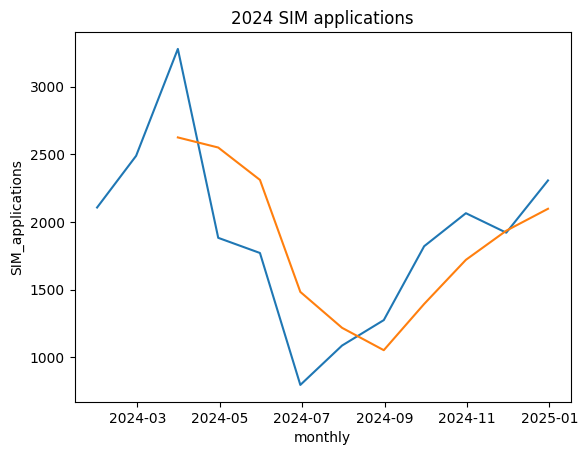

In [2]:
# analysis.ipynb
import sys
from pathlib import Path

# PROJECT_ROOT = Path("..").resolve()  # analysis/ の1つ上がプロジェクトルート
# if str(PROJECT_ROOT) not in sys.path:
#     sys.path.insert(0, str(PROJECT_ROOT))

# print("added:", PROJECT_ROOT)
# print("can see src?:", (PROJECT_ROOT / "src").exists())

import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from src.load_data import load_daily_data
# === CSV読み込み ===
df = load_daily_data()


# === 月ごとに集計 ===
df_monthly = (
    df
    .set_index("date")
    .resample("M")
    .sum()
)

# resample と group_by の違いの確認
# df_sim_appliccations_monthly_v2 = (
#     df_sim_appliccations_daily
#     .set_index("date")
#     .groupby("month")["applications"]
#     .sum()
#     .reset_index()
# )

# print(df_sim_appliccations_monthly_v2)

# === 3ヶ月の移動平均を算出,過去3日ヶ月分のデータを追加 ===
df_monthly["ma3"] = (
    df_monthly["applications"]
    .rolling(3)
    .mean()
    )

for n in range(1, 4):
    df_monthly[f"prev_{n}"] = (
        df_monthly["applications"]
        .shift(n)
        )

print(df_monthly)

# === 月次合計と3ヶ月平均のグラフ作成 ===
graph_path = Path("images/analysis.png")
fig = plt.figure()

# グラフ描画処理
sim_applications = df_monthly["applications"]
monthly_2024 = df_monthly.index

plt.plot(monthly_2024, sim_applications)
plt.plot(df_monthly["ma3"])
plt.xlabel("monthly")
plt.ylabel("SIM_applications")
plt.title("2024 SIM applications")
plt.savefig(graph_path)
plt.show()